# Marketing Analytics I - Group Project

## Understanding Customer Preferences on Gaming Monitors

## Objective

- The goal of this study is to understand the customer preferences on gaming monitors using conjoint analysis and clustering the customers to identify the target audience.

### Group K

- Manideep Telukuntla (mt39528)
- Amey Ghate (ag84957)
- Ashwanth Draksha (ad55293)
- Karthick Vel Kathirvel (kk37347)
- Jahnavi Angati (ja54632)

In [1]:
# import statements
import pandas as pd
import statsmodels.api as sm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Conjoint Analysis

### Data Preprocessing

In [2]:
# Load a specific sheet by name
xl = pd.read_excel('monitor_data.xlsx', sheet_name=0)

In [3]:
df = xl.copy()

In [4]:
df.columns = df.iloc[1].astype(str)

In [5]:
df = df.iloc[2:, :].reset_index().iloc[:, 1:]

In [6]:
df.rename(columns={'0.7': '70%', '0.85': '85%', '1.0': '100%', '250': '$250', '400.0': '$400', '550.0': '$550', '700.0': '$700', '850.0': '$850'}, inplace=True)

In [7]:
columns = ['85%', '100%', '$400', '$550', '$700', '$850']

In [8]:
for column in columns:
    df[column] = df[column].astype(int)

In [9]:
# Load a specific sheet by name
xl2 = pd.read_excel('monitor_data.xlsx', sheet_name=1)

In [10]:
df2 = xl2.copy()

In [11]:
df2 = df2.iloc[:, :-4]

In [12]:
df2.rename(columns={'Task #': 'Task'}, inplace=True)

In [13]:
merged_df = pd.merge(df2, df, on=['Version ID', 'Task', 'Alternatives'], how='left')

In [14]:
def map_adaptive_sync(row):
    if row['G-Sync'] == 1:
        return 'G-Sync'
    elif row['Free-Sync'] == 1:
        return 'Free-Sync'
    elif row['NoAdaptiveSync'] == 1:
        return 'No Adaptive Sync'
    return 'NoneOfThese'

def map_resolution(row):
    if row['1080p (FHD)'] == 1:
        return '1080p (FHD)'
    elif row['1440p (2k / QHD)'] == 1:
        return '1440p (2k / QHD)'
    elif row['2160p (4k / UHD)'] == 1:
        return '2160p (4k / UHD)'
    return 'NoneOfThese'

def map_refresh_rate(row):
    if row['75hz'] == 1:
        return '75hz'
    elif row['120hz'] == 1:
        return '120hz'
    elif row['144hz'] == 1:
        return '144hz'
    elif row['165hz'] == 1:
        return '165hz'
    elif row['240hz'] == 1:
        return '240hz'
    return 'NoneOfThese'

def map_wide_viewing_angle(row):
    if row['WVAYes'] == 1:
        return 'Yes'
    elif row['WVANo'] == 1:
        return 'No'
    return 'NoneOfThese'

def map_response_time(row):
    if row['1ms'] == 1:
        return '1ms'
    elif row['3ms'] == 1:
        return '3ms'
    elif row['5ms'] == 1:
        return '5ms'
    return 'NoneOfThese'

def map_hdr(row):
    if row['HDRYes'] == 1:
        return 'Yes'
    elif row['HDRNo'] == 1:
        return 'No'
    return 'NoneOfThese'

def map_color_gamut(row):
    if row['70%'] == 1:
        return '70%'
    elif row['85%'] == 1:
        return '85%'
    elif row['100%'] == 1:
        return '100%'
    return 'NoneOfThese'

def map_price(row):
    if row['$250'] == 1:
        return '$250'
    elif row['$400'] == 1:
        return '$400'
    elif row['$550'] == 1:
        return '$550'
    elif row['$700'] == 1:
        return '$700'
    elif row['$850'] == 1:
        return '$850'
    return 'NoneOfThese'

def map_screen_type(row):
    if row['Widescreen'] == 1:
        return 'Widescreen'
    elif row['Ultra-Wide'] == 1:
        return 'Ultra-Wide'
    elif row['Curved'] == 1:
        return 'Curved'
    elif row['Curved Ultra-Wide'] == 1:
        return 'Curved Ultra-Wide'
    return 'NoneOfThese'

def map_screen_size(row):
    if row['21"'] == 1:
        return '21"'
    elif row['24"'] == 1:
        return '24"'
    elif row['27"'] == 1:
        return '27"'
    elif row['30"'] == 1:
        return '30"'
    elif row['35"'] == 1:
        return '35"'
    return 'NoneOfThese'

In [15]:
data = merged_df.copy()

In [16]:
# Example of applying one of the functions
data['ScreenType'] = data.apply(map_screen_type, axis=1)
data['ScreenSize'] = data.apply(map_screen_size, axis=1)
data['AdaptiveSync'] = data.apply(map_adaptive_sync, axis=1)
data['Resolution'] = data.apply(map_resolution, axis=1)
data['RefreshRate'] = data.apply(map_refresh_rate, axis=1)
data['WideViewingAngle'] = data.apply(map_wide_viewing_angle, axis=1)
data['ResponseTime'] = data.apply(map_response_time, axis=1)
data['HDR'] = data.apply(map_hdr, axis=1)
data['ColorGamut'] = data.apply(map_color_gamut, axis=1)
data['Price'] = data.apply(map_price, axis=1)

In [17]:
columns_to_drop = [
    'G-Sync', 'Free-Sync', 'NoAdaptiveSync',
    '1080p (FHD)', '1440p (2k / QHD)', '2160p (4k / UHD)',
    '75hz', '120hz', '144hz', '165hz', '240hz',
    'WVAYes', 'WVANo',
    '1ms', '3ms', '5ms',
    'HDRYes', 'HDRNo',
    '70%', '85%', '100%',
    '$250', '$400', '$550', '$700', '$850',
    'Widescreen', 'Ultra-Wide', 'Curved', 'Curved Ultra-Wide',
    '21"', '24"', '27"', '30"', '35"'
]

# Assuming 'df' is your DataFrame
data = data.drop(columns=columns_to_drop)

## Running Logit Model on entire dataset

In [18]:
import pandas as pd

# Assume X is your input DataFrame and it contains the categorical variables you listed.
# Assume 'Choice' is your dependent variable and the rest are independent variables
X = data.drop(columns=['Respondent ID', 'Version ID', 'Task', 'Alternatives', 'Choice'])
y = data['Choice']

# Perform one-hot encoding without dropping any category
X_encoded = pd.get_dummies(X)

# Manually drop the baseline categories
baselines = {
    'ScreenType': 'Widescreen',
    'ScreenSize': '24"',
    'AdaptiveSync': 'No Adaptive Sync',
    'Resolution': '1080p (FHD)',
    'RefreshRate': '75hz',
    'WideViewingAngle': 'No',  # Assuming binary options: Yes/No
    'ResponseTime': '5ms',
    'HDR': 'No',
    'ColorGamut': '70%',  # Assuming this is the category name
    'Price': '$400'  # Assuming this is the category name and prices are categorical
}

# Loop through the baseline dictionary and drop the corresponding columns
for column, baseline in baselines.items():
    baseline_column = f'{column}_{baseline}'
    if baseline_column in X_encoded.columns:
        X_encoded.drop(baseline_column, axis=1, inplace=True)

# Now X_encoded has the specified baselines removed

In [19]:
duplicated_columns = X_encoded.columns[X_encoded.T.duplicated()].tolist()

In [20]:
X = X_encoded.copy()
# Check for duplicated columns
duplicated_columns = X.columns[X.T.duplicated()].tolist()

# Create a new column that is 1 if all 'NoneOfThese' columns are 1, and 0 otherwise
#X['All_NoneOfThese'] = X[duplicated_columns].min(axis=1)

# Drop the original 'NoneOfThese' columns
X = X.drop(columns=duplicated_columns)

In [21]:
X.head()

,ScreenType_Curved,ScreenType_Curved Ultra-Wide,ScreenType_NoneOfThese,ScreenType_Ultra-Wide,"ScreenSize_21""","ScreenSize_27""","ScreenSize_30""","ScreenSize_35""",AdaptiveSync_Free-Sync,AdaptiveSync_G-Sync,...,WideViewingAngle_Yes,ResponseTime_1ms,ResponseTime_3ms,HDR_Yes,ColorGamut_100%,ColorGamut_85%,Price_$250,Price_$550,Price_$700,Price_$850
0,0,0,0,0,0,0,0,1,1,0,...,1,1,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,1,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,1


In [22]:
# Create a logistic regression model (common for CBC analysis)
model = sm.Logit(y, X)
result = model.fit()

# Print the summary statistics of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.520234
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                18480
Model:                          Logit   Df Residuals:                    18454
Method:                           MLE   Df Model:                           25
Date:                Tue, 07 Nov 2023   Pseudo R-squ.:                 0.07487
Time:                        10:39:41   Log-Likelihood:                -9613.9
converged:                       True   LL-Null:                       -10392.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
ScreenType_Curved               -0.6086      0.058    -10.574      0.000

### Conjoint Analysis Interpretation of Gaming Monitors Preferences

Insights derived from Logit Model:

#### Screen Type
- **Curved**: The negative coefficient of -0.6086, which is statistically significant (p < 0.001), indicates a strong preference against curved monitors compared to the baseline widescreen monitors.
- **Curved Ultra-Wide**: With a coefficient of -0.6430 and statistical significance (p < 0.001), curved ultra-wide monitors are also less preferred than widescreen monitors.
- **NoneOfThese**: This category has the most substantial negative impact on preference with a coefficient of -1.2826, which is highly statistically significant (p < 0.001).
- **Ultra-Wide**: Ultra-wide monitors are less preferred with a coefficient of -0.6749, which is statistically significant (p < 0.001).

#### Screen Size
- **21"**: Significantly less preferred than the 24" baseline (coef = -0.6144, p < 0.001).
- **27"**: A smaller negative coefficient of -0.3611 (p < 0.001) indicates that while 27" screens are less preferred than 24", the aversion is not as strong as for other sizes.
- **30"**: Shows significant negative preference relative to the baseline (coef = -0.5111, p < 0.001).
- **35"**: Similar to 30", the 35" screens are less preferred (coef = -0.5242, p < 0.001).

#### Adaptive Sync
- **Free-Sync**: With a statistically significant negative coefficient of -0.2099 (p < 0.001), Free-Sync is less preferred compared to no adaptive sync.
- **G-Sync**: The coefficient of 0.0196 is not statistically significant (p = 0.692), suggesting no strong preference for or against G-Sync compared to the baseline.

#### Resolution
- **1440p (2k / QHD)**: The coefficient of 0.0144 is not statistically significant (p = 0.775), implying no strong preference for 1440p over the baseline 1080p resolution.
- **2160p (4k / UHD)**: A positive coefficient of 0.1764 (p < 0.001) indicates a statistically significant preference for 4k resolution.

#### Refresh Rate
- **120hz**: Not significantly preferred over 75hz (coef = 0.0976, p = 0.143).
- **144hz**: Has a statistically significant positive coefficient of 0.3952 (p < 0.001), indicating a preference for this refresh rate.
- **165hz**: Also preferred, with a coefficient of 0.2876 (p < 0.001).
- **240hz**: The highest positive impact on preference with a coefficient of 0.4523, which is statistically significant (p < 0.001).

#### Wide Viewing Angle
- **Yes**: The negative coefficient of -0.1115 (p = 0.009) suggests that monitors with wide viewing angles are less preferred than those without.

#### Response Time
- **1ms**: Significantly preferred over the 5ms baseline (coef = 0.5224, p < 0.001).
- **3ms**: The coefficient of 0.0724 is not statistically significant (p = 0.164), indicating no strong preference for 3ms over 5ms.

#### HDR
- **Yes**: Slightly less preferred than not having HDR, with a coefficient of -0.0798 that is borderline statistically significant (p = 0.055).

#### Color Gamut
- **100%**: The coefficient of 0.0133 is not statistically significant (p = 0.791).
- **85%**: Also not significantly different from the baseline with a coefficient of -0.0555 (p = 0.260).

#### Price
- **\$250**: More preferred than the baseline \$400 (coef = 0.3384, p < 0.001).
- **\$550**: Less preferred with a statistically significant negative coefficient of -0.6451 (p < 0.001).
- **\$700**: Even less preferred with a coefficient of -1.2272 (p < 0.001).
- **\$850**: The least preferred price point with a significant negative coefficient of -1.4777 (p < 0.001).

The model indicates a consumer preference for widescreen monitors with a screen size at or below 24 inches, without wide viewing angles, with fast response times (1ms), and at lower price points (`\$250`). Higher resolution (`4k`) and refresh rate (`240hz`) are valued, but these preferences are overshadowed by the negative impact of higher prices. 

## Attribute Importance

In [23]:
# Coefficients from the logistic regression model
coefficients = {
    'ScreenType_Curved': -0.6086,
    'ScreenType_Curved Ultra-Wide': -0.6430,
    'ScreenType_NoneOfThese': -1.2826,
    'ScreenType_Ultra-Wide': -0.6749,
    'ScreenSize_21"': -0.6144,
    'ScreenSize_27"': -0.3611,
    'ScreenSize_30"': -0.5111,
    'ScreenSize_35"': -0.5242,
    'AdaptiveSync_Free-Sync': -0.2099,
    'AdaptiveSync_G-Sync': 0.0196,
    'Resolution_1440p (2k / QHD)': 0.0144,
    'Resolution_2160p (4k / UHD)': 0.1764,
    'RefreshRate_120hz': 0.0976,
    'RefreshRate_144hz': 0.3952,
    'RefreshRate_165hz': 0.2876,
    'RefreshRate_240hz': 0.4523,
    'WideViewingAngle_Yes': -0.1115,
    'ResponseTime_1ms': 0.5224,
    'ResponseTime_3ms': 0.0724,
    'HDR_Yes': -0.0798,
    'ColorGamut_100%': 0.0133,
    'ColorGamut_85%': -0.0555,
    'Price_$250': 0.3384,
    'Price_$550': -0.6451,
    'Price_$700': -1.2272,
    'Price_$850': -1.4777
}

# Create a DataFrame from the coefficients
coef_df = pd.DataFrame(list(coefficients.items()), columns=['Feature', 'Coefficient'])

# Split the feature column to separate attribute and level
coef_df[['Attribute', 'Level']] = coef_df['Feature'].str.rsplit('_', n=1, expand=True)

# Calculate the range of utility for each attribute
attribute_range = coef_df.groupby('Attribute')['Coefficient'].agg(lambda x: x.max() - x.min())

# Calculate the total utility range
total_utility_range = attribute_range.sum()

# Calculate the relative importance for each attribute
attribute_importance = attribute_range / total_utility_range

# Normalize to make the sum of importance 100%
attribute_importance = (attribute_importance / attribute_importance.sum()) * 100

# Reset the index for sorting and rename columns for clarity
percentage_importance_df = attribute_importance.sort_values(ascending=False).reset_index()
percentage_importance_df.columns = ['Attribute', 'Percentage_Importance']

# Now you have a DataFrame with the relative importance of each attribute
print(percentage_importance_df)

          Attribute  Percentage_Importance
0             Price              45.307355
1        ScreenType              16.814689
2      ResponseTime              11.226425
3       RefreshRate               8.848917
4        ScreenSize               6.319230
5      AdaptiveSync               5.725476
6        Resolution               4.041513
7        ColorGamut               1.716396
8               HDR               0.000000
9  WideViewingAngle               0.000000


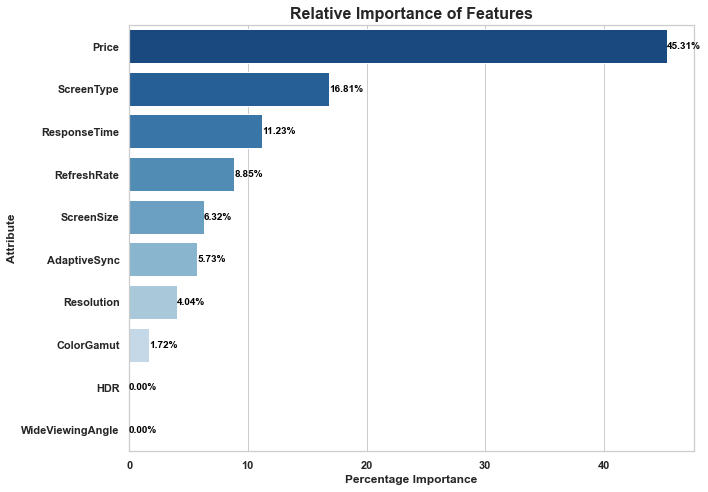

In [24]:
# Create the bar plot
plt.figure(figsize=(10, 7))  # Keep the increased figure size

sns.set(style="whitegrid")

# Choosing a color palette
colors = sns.color_palette("Blues_r", len(percentage_importance_df))

# Plotting the horizontal bar chart
barplot = sns.barplot(x='Percentage_Importance', y='Attribute', data=percentage_importance_df, palette=colors)

# Add labels to the bars and make the text bold
for index, value in enumerate(percentage_importance_df['Percentage_Importance']):
    barplot.text(value, index, f'{value:.2f}%', ha='left', va='center', color='black', fontsize=10, weight='bold')

# Title and labels with bold text
plt.title('Relative Importance of Features', fontsize=16, fontweight='bold')
plt.xlabel('Percentage Importance', fontsize=12, fontweight='bold')
plt.ylabel('Attribute', fontsize=12, fontweight='bold')

# Set x and y tick labels as bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Improved layout to avoid trimming of axis titles
plt.tight_layout()

# Export the plot with transparent background
plt.savefig('attribute_importance_plot.png', transparent=True, dpi=300)

# Show the plot
plt.show()

### Conjoint Analysis: Attribute Importance for Gaming Monitors

The attribute importance scores from conjoint analysis reveal the preferences of consumers regarding various features of gaming monitors. Below is an interpretation of these scores:

#### Price - Importance: 45.307355
- **Price** is the most critical attribute for consumers when choosing gaming monitors. The high importance score indicates that pricing strategies are pivotal in influencing consumer choice. Marketers should emphasize competitive pricing to attract consumers.

#### Screen Type - Importance: 16.814689
- **Screen Type** is the second most influential attribute. Consumers have strong preferences for certain screen types, and this preference markedly affects their purchasing decision.

#### Response Time - Importance: 11.226425
- **Response Time** is crucial, reflecting consumer demand for lower response times which are synonymous with better gaming performance.

#### Refresh Rate - Importance: 8.848917
- **Refresh Rate** closely follows response time in importance, highlighting consumer preference for smoother visuals in gaming experiences.

#### Screen Size - Importance: 6.319230
- **Screen Size** is significantly important, showing that the physical size of the monitor is a key factor in consumer preference.

#### Adaptive Sync - Importance: 5.725476
- **Adaptive Sync** is important but less so than screen size, response time, and refresh rate. Features like NVIDIA's G-Sync or AMD's FreeSync, which reduce screen tearing and stuttering, are valued by consumers.

#### Resolution - Importance: 4.041513
- **Resolution** holds importance but to a lesser extent compared to other attributes. Higher resolutions, which offer clearer and more detailed images, are desirable but not the top priority for consumers.

#### Color Gamut - Importance: 1.716396
- **Color Gamut** has a lower importance score, suggesting that the range of colors a monitor can display influences consumer decisions to a smaller degree.

#### HDR - Importance: 0.000000
- **HDR (High Dynamic Range)** has an importance score of zero, indicating that it may not be a differentiating factor in the decision-making process for the surveyed consumers.

#### Wide Viewing Angle - Importance: 0.000000
- **Wide Viewing Angle** also has an importance score of zero, showing that it does not significantly impact the choice of gaming monitors among the consumers surveyed.

In summary, the analysis indicates that **price**, **screen type**, and **display performance features** such as **response time** and **refresh rate** are the most influential attributes for consumers purchasing gaming monitors. Less critical are **color gamut**, **HDR**, and **wide viewing angle**, which do not significantly sway consumer choice in this dataset.

In [25]:
import numpy as np

# Coefficients
coefficients = {
    'Price_$250': 0.3384,
    'Price_$550': -0.6451,
    'Price_$700': -1.2272,
    'Price_$850': -1.4777
}

# Calculate the absolute values
abs_coefficients = np.abs(list(coefficients.values()))

# Calculate the sum of absolute values
sum_abs_coefficients = np.sum(abs_coefficients)

# Calculate the percentage importance
percentage_importance = (abs_coefficients / sum_abs_coefficients) * 100

# Assign the percentage importance to each price
percentage_importance_dict = {k: v for k, v in zip(coefficients.keys(), percentage_importance)}

# Output the percentage importance
for price, importance in percentage_importance_dict.items():
    print(f"Percentage importance of {price}: {importance:.2f}%")

Percentage importance of Price_$250: 9.17%
Percentage importance of Price_$550: 17.49%
Percentage importance of Price_$700: 33.27%
Percentage importance of Price_$850: 40.06%


In [26]:
import numpy as np

# Coefficients dictionary
coefficients = {
    'ScreenType_Curved': -0.6086,
    'ScreenType_Curved Ultra-Wide': -0.6430,
    'ScreenType_NoneOfThese': -1.2826,
    'ScreenType_Ultra-Wide': -0.6749,
    'ScreenSize_21"': -0.6144,
    'ScreenSize_27"': -0.3611,
    'ScreenSize_30"': -0.5111,
    'ScreenSize_35"': -0.5242,
    'AdaptiveSync_Free-Sync': -0.2099,
    'AdaptiveSync_G-Sync': 0.0196,
    'Resolution_1440p (2k / QHD)': 0.0144,
    'Resolution_2160p (4k / UHD)': 0.1764,
    'RefreshRate_120hz': 0.0976,
    'RefreshRate_144hz': 0.3952,
    'RefreshRate_165hz': 0.2876,
    'RefreshRate_240hz': 0.4523,
    'WideViewingAngle_Yes': -0.1115,
    'ResponseTime_1ms': 0.5224,
    'ResponseTime_3ms': 0.0724,
    'HDR_Yes': -0.0798,
    'ColorGamut_100%': 0.0133,
    'ColorGamut_85%': -0.0555,
    'Price_$250': 0.3384,
    'Price_$550': -0.6451,
    'Price_$700': -1.2272,
    'Price_$850': -1.4777
}

# Calculate absolute values of the coefficients
abs_coefficients = np.abs(list(coefficients.values()))

# Calculate the sum of absolute values
sum_abs_coefficients = np.sum(abs_coefficients)

# Calculate percentage importance
percentage_importance = (abs_coefficients / sum_abs_coefficients) * 100

# Create a DataFrame from the dictionary
percentage_importance_df = pd.DataFrame(list(coefficients.items()), columns=['Feature', 'Coefficient'])

# Add the percentage importance to the DataFrame
percentage_importance_df['Percentage Importance'] = percentage_importance

# Sort the DataFrame by percentage importance in descending order
percentage_importance_df.sort_values(by='Percentage Importance', ascending=False, inplace=True)

# Reset the index of the DataFrame
percentage_importance_df.reset_index(drop=True, inplace=True)

# Print the DataFrame
print(percentage_importance_df)

                         Feature  Coefficient  Percentage Importance
0                     Price_$850      -1.4777              12.943887
1         ScreenType_NoneOfThese      -1.2826              11.234912
2                     Price_$700      -1.2272              10.749636
3          ScreenType_Ultra-Wide      -0.6749               5.911774
4                     Price_$550      -0.6451               5.650742
5   ScreenType_Curved Ultra-Wide      -0.6430               5.632347
6                 ScreenSize_21"      -0.6144               5.381826
7              ScreenType_Curved      -0.6086               5.331021
8                 ScreenSize_35"      -0.5242               4.591721
9               ResponseTime_1ms       0.5224               4.575953
10                ScreenSize_30"      -0.5111               4.476971
11             RefreshRate_240hz       0.4523               3.961914
12             RefreshRate_144hz       0.3952               3.461747
13                ScreenSize_27"  

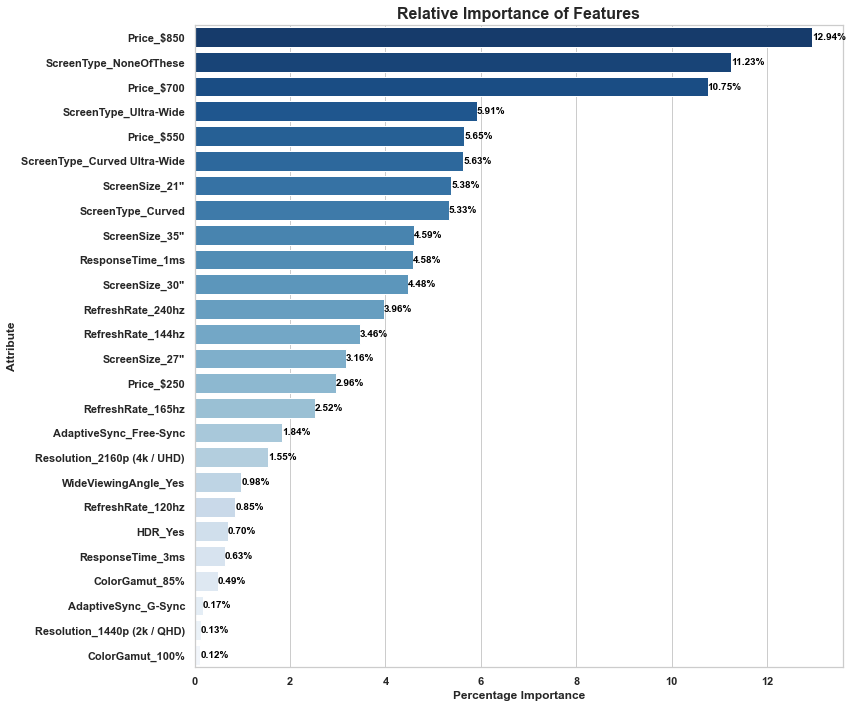

In [27]:
# Plotting the data
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

# Choosing a color palette
colors = sns.color_palette("Blues_r", len(percentage_importance_df))

# Plotting the horizontal bar chart
barplot = sns.barplot(x='Percentage Importance', y='Feature', data=percentage_importance_df, palette=colors)

# Add labels to the bars and make the text bold
for index, value in enumerate(percentage_importance_df['Percentage Importance']):
    barplot.text(value, index, f'{value:.2f}%', ha='left', va='center', color='black', fontsize=10, weight='bold')

# Title and labels with bold text
plt.title('Relative Importance of Features', fontsize=16, fontweight='bold')
plt.xlabel('Percentage Importance', fontsize=12, fontweight='bold')
plt.ylabel('Attribute', fontsize=12, fontweight='bold')

# Set x and y tick labels as bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Improved layout to avoid trimming of axis titles
plt.tight_layout()

# Export the plot with transparent background
plt.savefig('attribute_importance_plot.png', transparent=True, dpi=300)

# Show the plot
plt.show()

## Price Sensitivity

In [28]:
import numpy as np

# Calculate baseline odds using the coefficient for the $400 price point
baseline_price_coefficient = 0.3384
baseline_odds = np.exp(baseline_price_coefficient)

# Prices
prices = {
    '$550': -0.6451,
    '$700': -1.2272,
    '$850': -1.4777
}

# Base price in dollars
base_price = 250

# Calculate elasticities
elasticities = {}
for price_str, coeff in prices.items():
    # Calculate new odds
    new_odds = np.exp(coeff)
    # Calculate percentage change in odds
    percent_change_odds = (new_odds - baseline_odds) / baseline_odds
    # Calculate percentage change in price
    new_price = int(price_str.strip('$'))
    percent_change_price = (new_price - base_price) / base_price
    # Calculate elasticity
    elasticity = percent_change_odds / percent_change_price
    elasticities[price_str] = elasticity

elasticities

{'$550': -0.5216668282447212,
 '$700': -0.4394652233368359,
 '$850': -0.3488921311784211}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


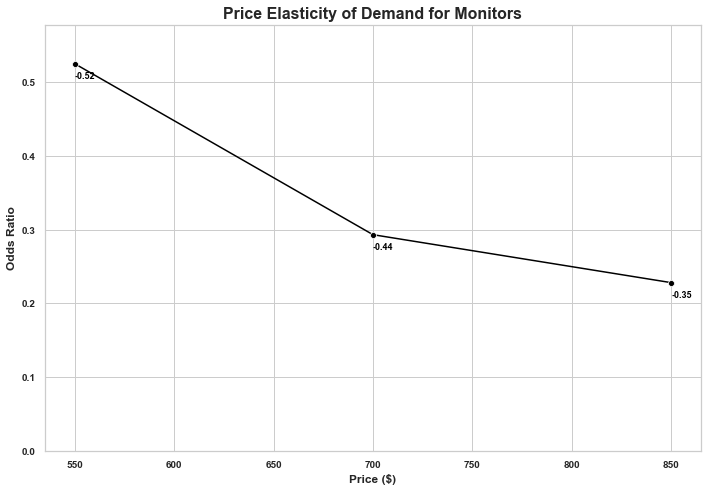

In [29]:
# Convert price strings to integers
prices_int = [int(price.strip('$')) for price in elasticities.keys()]
# Get the odds ratios for each price point
odds_ratios = [np.exp(coeff) for coeff in prices.values()]

# Plotting using Seaborn
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
sns.lineplot(x=prices_int, y=odds_ratios, marker='o', color='black')

# Annotate each point with its elasticity value
for price, elasticity in zip(prices_int, elasticities.values()):
    plt.annotate(f"{elasticity:.2f}", (price, np.exp(prices[f"${price}"])), xytext=(10, -15), textcoords='offset points', fontsize=9, ha='center', color='black', fontweight='bold')

# Styling the plot with bold text
plt.title('Price Elasticity of Demand for Monitors', fontsize=16, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12, fontweight='bold')
plt.ylabel('Odds Ratio', fontsize=12, fontweight='bold')
plt.xticks(np.arange(min(prices_int), max(prices_int) + 1, 50), fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)

# Set y-axis to start from zero
plt.ylim(0, max(odds_ratios) * 1.1)

# Remove the legend
plt.legend().remove()

# Save the plot as a high-resolution PNG with transparent background
plt.tight_layout()
plt.savefig("PriceElasticity.png", dpi=300, transparent=True)

# Show the plot
plt.show()

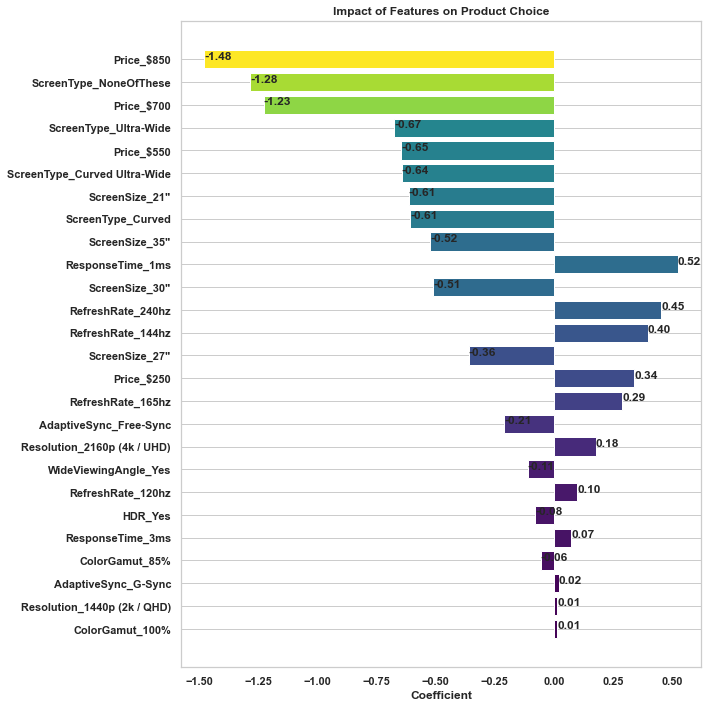

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import numpy as np

# Coefficients as provided
coefficients = {
    'ScreenType_Curved': -0.6086,
    'ScreenType_Curved Ultra-Wide': -0.6430,
    'ScreenType_NoneOfThese': -1.2826,
    'ScreenType_Ultra-Wide': -0.6749,
    'ScreenSize_21"': -0.6144,
    'ScreenSize_27"': -0.3611,
    'ScreenSize_30"': -0.5111,
    'ScreenSize_35"': -0.5242,
    'AdaptiveSync_Free-Sync': -0.2099,
    'AdaptiveSync_G-Sync': 0.0196,
    'Resolution_1440p (2k / QHD)': 0.0144,
    'Resolution_2160p (4k / UHD)': 0.1764,
    'RefreshRate_120hz': 0.0976,
    'RefreshRate_144hz': 0.3952,
    'RefreshRate_165hz': 0.2876,
    'RefreshRate_240hz': 0.4523,
    'WideViewingAngle_Yes': -0.1115,
    'ResponseTime_1ms': 0.5224,
    'ResponseTime_3ms': 0.0724,
    'HDR_Yes': -0.0798,
    'ColorGamut_100%': 0.0133,
    'ColorGamut_85%': -0.0555,
    'Price_$250': 0.3384,
    'Price_$550': -0.6451,
    'Price_$700': -1.2272,
    'Price_$850': -1.4777
}

# Create a DataFrame from the coefficients dictionary
df = pd.DataFrame(list(coefficients.items()), columns=['Feature', 'Coefficient'])

# Sort the DataFrame by the absolute value of the coefficients for better visualization
df['abs_coefficient'] = df['Coefficient'].abs()
df = df.sort_values(by='abs_coefficient', ascending=True)

# Generate colors from a colormap
colors = cm.viridis(df['abs_coefficient'] / df['abs_coefficient'].max())

# Plotting
plt.figure(figsize=(10, 10))
bars = plt.barh(df['Feature'], df['Coefficient'], color=colors)
plt.xlabel('Coefficient', fontweight='bold')
plt.title('Impact of Features on Product Choice', fontweight='bold')
plt.grid(axis='x')

# Annotate the bars with the coefficient values
for bar, value in zip(bars, df['Coefficient']):
    plt.text(value if value > 0 else bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.2f}', fontweight='bold')
# Set x and y tick labels as bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
# Save the plot as a high-resolution PNG with transparent background
plt.tight_layout()
plt.savefig("FeatureImpact.png", dpi=300, transparent=True)

plt.show()

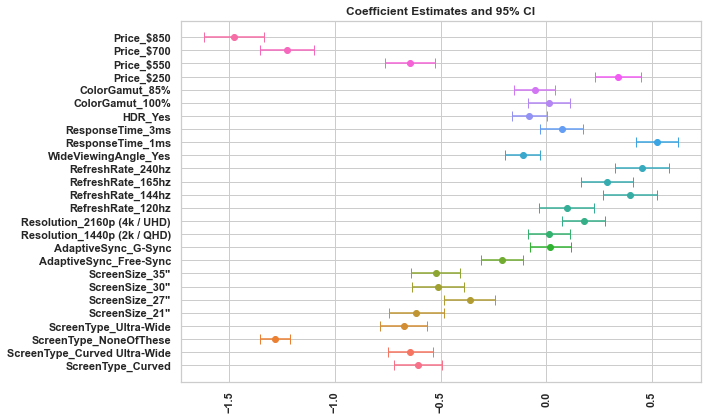

In [31]:
# Extract the coefficients and errors
coefficients = result.params
errors = result.bse

# Choose a color palette
palette = sns.color_palette("husl", len(coefficients))

# Plotting the coefficients with their confidence intervals
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
for i, (coef, error) in enumerate(zip(coefficients, errors)):
    plt.errorbar(x=coef, y=i, xerr=1.96*error, fmt='o', color=palette[i], ecolor=palette[i], capsize=5)

plt.yticks(ticks=range(len(coefficients)), labels=coefficients.index, fontweight='bold')  # Make y-tick labels bold
plt.xticks(rotation=90, fontweight='bold')  # Rotate x-tick labels and make them bold
plt.title('Coefficient Estimates and 95% CI', fontweight='bold')  # Set title in bold

# Set a grid for easier reading
plt.grid(True)

# Set x and y tick labels as bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
# Save the plot as a high-resolution PNG with transparent background
plt.tight_layout()
plt.savefig("CoefficientEstimates.png", dpi=300, transparent=True)

# Show the plot
plt.show()

## Segmentation

In [34]:
# Created a utility df 
Utility_df = X

In [35]:
#Doing sum product calculation to calculate utility score
Utility_df['Utility_Score'] = Utility_df.apply(lambda row: sum(coefficients[attr] for attr in row.index if row[attr] == 1 and attr in coefficients), axis=1)

In [36]:
#Adding back the columns to do grouping
columns_to_concat = ['Respondent ID','Task','Alternatives', 'Choice']
Utility_df = pd.concat([merged_df[columns_to_concat], Utility_df], axis=1)
Utility_df = Utility_df[Utility_df['Choice'] == 1]

In [37]:
#Created a data frame to store the mean respondent utilty score for clustring
part_worth_utilities = Utility_df.groupby('Respondent ID')['Utility_Score'].mean().reset_index()

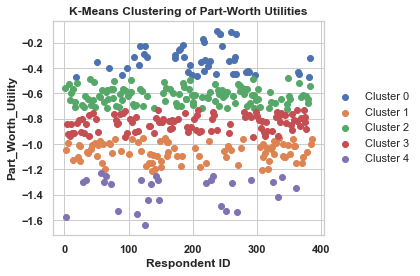

     Respondent ID  Utility_Score  Cluster
0                1      -0.558985        2
1                2      -1.575302        4
2                3      -1.045337        1
3                4      -0.837289        3
4                5      -0.992053        1
..             ...            ...      ...
380            381      -0.470394        0
381            382      -0.541434        2
382            383      -0.320577        0
383            384      -0.995674        1
384            385      -0.963315        1

[385 rows x 3 columns]


In [38]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = part_worth_utilities[['Utility_Score']].values

# Define the number of clusters (you can adjust this)
n_clusters = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
part_worth_utilities['Cluster'] = kmeans.fit_predict(X)

# Create a scatter plot for each cluster
for cluster_num in range(n_clusters):
    cluster_data = part_worth_utilities[part_worth_utilities['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Respondent ID'], cluster_data['Utility_Score'], label=f'Cluster {cluster_num}')

# Add legend outside the plot on the right side
plt.xlabel('Respondent ID', fontweight='bold')
plt.ylabel('Part_Worth_Utility', fontweight='bold')
plt.title('K-Means Clustering of Part-Worth Utilities', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Set legend background to be transparent
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.tight_layout()

# Save the plot with a transparent background and higher DPI
plt.savefig("ClusterAnalysis.png", dpi=300, transparent=True)
plt.show()

# Print the DataFrame with the 'Cluster' column
print(part_worth_utilities)

In [39]:
#Mean utility score in each cluster
feature_means = part_worth_utilities.groupby('Cluster')['Utility_Score'].mean().reset_index()
feature_means

,Cluster,Utility_Score
0,0,-0.332675
1,1,-1.060713
2,2,-0.616594
3,3,-0.832269
4,4,-1.367696


In [40]:
#Doing join to add the cluster label to the utilities dataframe
Utility_df = Utility_df.merge(part_worth_utilities[['Respondent ID', 'Cluster']], on='Respondent ID', how='left')

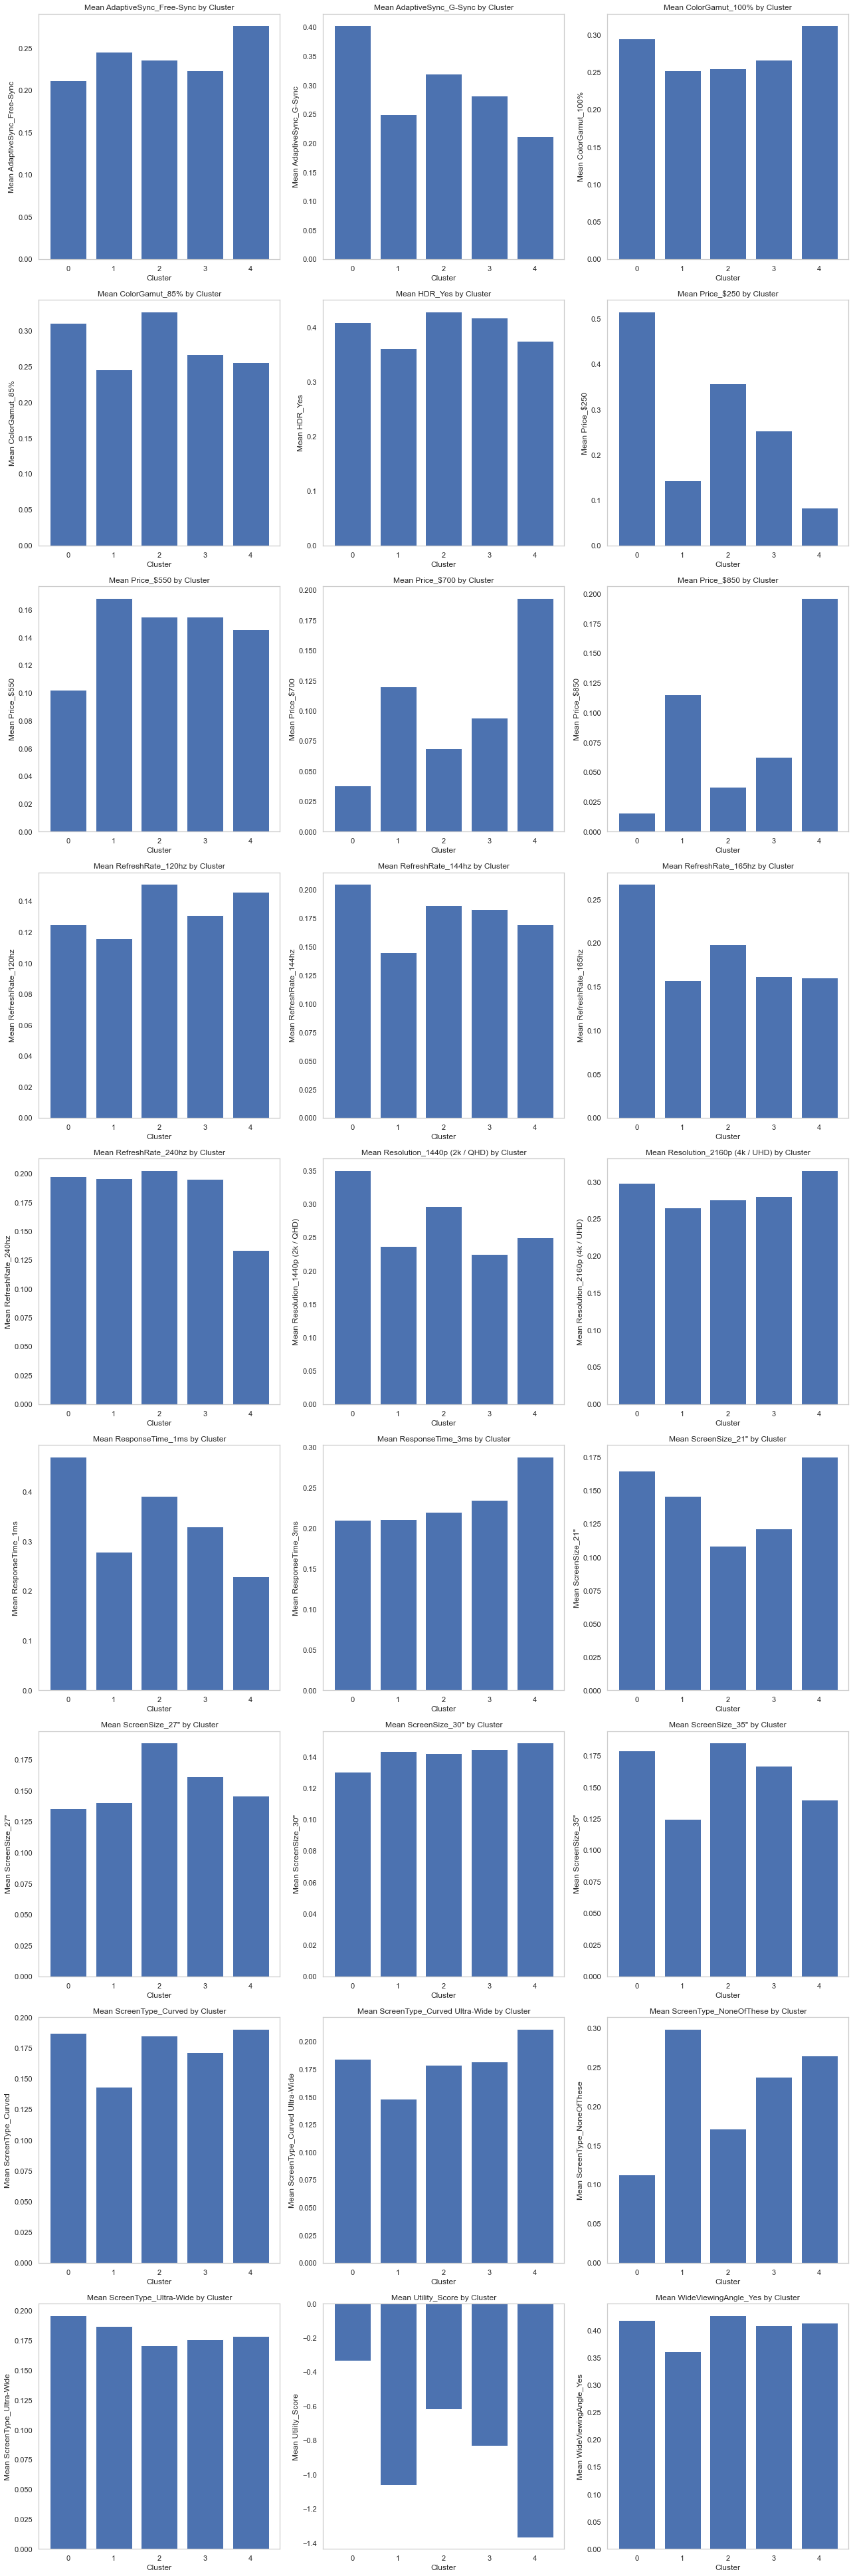

In [41]:
import matplotlib.pyplot as plt

# Group the data by 'Cluster' and calculate the mean for each attribute
cluster_means = Utility_df.groupby('Cluster').mean()

# List of key attributes (excluding non-numeric columns)
key_attributes = cluster_means.columns.difference(['Respondent ID', 'Task', 'Alternatives', 'Choice'])

# Define the number of plots per row
plots_per_row = 3

# Calculate the number of rows needed for subplots
num_attributes = len(key_attributes)
num_rows = (num_attributes + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(18, 6 * num_rows))

# Flatten the axes if needed
if num_rows == 1:
    axes = [axes]

# Iterate through the key attributes and create bar plots for each
for i, attribute in enumerate(key_attributes):
    row_idx, col_idx = divmod(i, plots_per_row)
    ax = axes[row_idx][col_idx]
    
    # Create a bar plot for the mean attribute values for each cluster
    cluster_data = cluster_means[attribute]
    clusters = cluster_data.index
    ax.bar(clusters, cluster_data)
    
    ax.set_title(f'Mean {attribute} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(f'Mean {attribute}')
    ax.grid()

# Remove any empty subplots
for i in range(num_attributes, num_rows * plots_per_row):
    row_idx, col_idx = divmod(i, plots_per_row)
    fig.delaxes(axes[row_idx][col_idx])

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


## Running Logit model on every respondent

In [42]:
import pandas as pd
import statsmodels.api as sm

# Initialize an empty DataFrame to store the coefficients for each respondent
coefficients_df = pd.DataFrame()

# Define the baseline categories for dropping after encoding
baselines = {
    'ScreenType': 'Widescreen',
    'ScreenSize': '24"',
    'AdaptiveSync': 'No Adaptive Sync',
    'Resolution': '1080p (FHD)',
    'RefreshRate': '75hz',
    'WideViewingAngle': 'No',
    'ResponseTime': '5ms',
    'HDR': 'No',
    'ColorGamut': '70%',
    'Price': '$400'
}

# Loop over each unique respondent ID in the data
for respondent_id in data['Respondent ID'].unique():
    # Filter the data for the current respondent
    data_filtered = data[data["Respondent ID"] == respondent_id]
    
    # Prepare the independent (X) and dependent (y) variables
    X = data_filtered.drop(columns=['Respondent ID', 'Version ID', 'Task', 'Alternatives', 'Choice'])
    y = data_filtered['Choice']

    # Perform one-hot encoding without dropping any category
    X_encoded = pd.get_dummies(X)

    # Drop the baseline categories
    for column, baseline in baselines.items():
        baseline_column = f'{column}_{baseline}'
        if baseline_column in X_encoded.columns:
            X_encoded.drop(baseline_column, axis=1, inplace=True)

    # Check for duplicated columns after encoding and drop them
    duplicated_columns = X_encoded.columns[X_encoded.T.duplicated()].tolist()
    X_encoded = X_encoded.drop(columns=duplicated_columns)

    # Add a constant term to get the intercept
    X_encoded_with_intercept = sm.add_constant(X_encoded)

    # Try to fit the logistic regression model
    try:
        # Create a logistic regression model
        model = sm.Logit(y, X_encoded_with_intercept)
        result = model.fit(disp=0)  # disp=0 turns off the convergence messages

        # Retrieve the respondent's coefficients including the intercept
        respondent_coefficients = result.params
        
    except Exception as e:
        # Print the error and respondent ID to know which one failed
        print(f"Error with respondent ID {respondent_id}: {e}")
        # Fill the coefficients with NaN or some other value, including one for the intercept
        respondent_coefficients = pd.Series([float('nan')] * (len(X_encoded_with_intercept.columns)), index=X_encoded_with_intercept.columns)
    
    # Convert the coefficients to a DataFrame
    respondent_coefficients_df = pd.DataFrame([respondent_coefficients], index=[respondent_id])

    # Append the respondent's coefficients to the main coefficients DataFrame
    coefficients_df = pd.concat([coefficients_df, respondent_coefficients_df], ignore_index=False)

# Set the index to the respondent ID for the final DataFrame
coefficients_df.index.name = 'Respondent ID'

# Depending on what you need to do next, you might save it to a file:
# coefficients_df.to_csv('coefficients_per_respondent.csv')

Error with respondent ID 1: Singular matrix
Error with respondent ID 2: Singular matrix
Error with respondent ID 3: Singular matrix
Error with respondent ID 4: Singular matrix
Error with respondent ID 5: Singular matrix
Error with respondent ID 6: Singular matrix
Error with respondent ID 7: Singular matrix
Error with respondent ID 8: Perfect separation detected, results not available
Error with respondent ID 9: Singular matrix
Error with respondent ID 11: Singular matrix
Error with respondent ID 12: Singular matrix
Error with respondent ID 13: Singular matrix
Error with respondent ID 14: Singular matrix
Error with respondent ID 15: Singular matrix
Error with respondent ID 16: Singular matrix
Error with respondent ID 17: Singular matrix
Error with respondent ID 18: Singular matrix
Error with respondent ID 19: Singular matrix
Error with respondent ID 20: Singular matrix
Error with respondent ID 21: Singular matrix
Error with respondent ID 22: Singular matrix
Error with respondent ID 23: 

Error with respondent ID 204: Singular matrix
Error with respondent ID 205: Singular matrix
Error with respondent ID 206: Perfect separation detected, results not available
Error with respondent ID 207: Singular matrix
Error with respondent ID 208: Singular matrix
Error with respondent ID 209: Singular matrix
Error with respondent ID 211: Singular matrix
Error with respondent ID 212: Singular matrix
Error with respondent ID 213: Singular matrix
Error with respondent ID 214: Singular matrix
Error with respondent ID 215: Singular matrix
Error with respondent ID 216: Singular matrix
Error with respondent ID 217: Singular matrix
Error with respondent ID 218: Singular matrix
Error with respondent ID 219: Singular matrix
Error with respondent ID 220: Singular matrix
Error with respondent ID 221: Singular matrix
Error with respondent ID 222: Singular matrix
Error with respondent ID 223: Singular matrix
Error with respondent ID 224: Singular matrix
Error with respondent ID 225: Singular matrix

In [43]:
coefficients_df

,const,ScreenType_Curved,ScreenType_Curved Ultra-Wide,ScreenType_NoneOfThese,ScreenType_Ultra-Wide,"ScreenSize_21""","ScreenSize_27""","ScreenSize_30""","ScreenSize_35""",AdaptiveSync_Free-Sync,...,WideViewingAngle_Yes,ResponseTime_1ms,ResponseTime_3ms,HDR_Yes,ColorGamut_100%,ColorGamut_85%,Price_$250,Price_$550,Price_$700,Price_$850
Respondent ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,-42.049746,1.620196,3.080531,41.356599,47.155846,28.896406,11.443008,36.913154,33.684954,4.5015,...,10.714652,-29.801649,-39.69624,-12.632181,-10.740152,-32.840455,45.65892,-9.562039,-29.968708,-10.346002
382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
import pandas as pd

# Assume X is your input DataFrame and it contains the categorical variables you listed.
# Assume 'Choice' is your dependent variable and the rest are independent variables
X_respondent = data.drop(columns=['Version ID', 'Task', 'Alternatives', 'Choice'])

# Perform one-hot encoding without dropping any category
X_respondent_encoded = pd.get_dummies(X_respondent)

# Manually drop the baseline categories
baselines = {
    'ScreenType': 'Widescreen',
    'ScreenSize': '24"',
    'AdaptiveSync': 'No Adaptive Sync',
    'Resolution': '1080p (FHD)',
    'RefreshRate': '75hz',
    'WideViewingAngle': 'No',  # Assuming binary options: Yes/No
    'ResponseTime': '5ms',
    'HDR': 'No',
    'ColorGamut': '70%',  # Assuming this is the category name
    'Price': '$400'  # Assuming this is the category name and prices are categorical
}

# Loop through the baseline dictionary and drop the corresponding columns
for column, baseline in baselines.items():
    baseline_column = f'{column}_{baseline}'
    if baseline_column in X_respondent_encoded.columns:
        X_respondent_encoded.drop(baseline_column, axis=1, inplace=True)

# Now X_encoded has the specified baselines removed

In [45]:
duplicated_columns = X_respondent_encoded.columns[X_respondent_encoded.T.duplicated()].tolist()

In [46]:
X2 = X_respondent_encoded.copy()
# Check for duplicated columns
duplicated_columns = X2.columns[X2.T.duplicated()].tolist()

# Create a new column that is 1 if all 'NoneOfThese' columns are 1, and 0 otherwise
#X['All_NoneOfThese'] = X[duplicated_columns].min(axis=1)

# Drop the original 'NoneOfThese' columns
X2 = X2.drop(columns=duplicated_columns)

In [47]:
final_coeff = coefficients_df.dropna().reset_index()

In [48]:
encoded_data = X2[X2['Respondent ID'].isin(final_coeff['Respondent ID'])]

In [49]:
encoded_data

,Respondent ID,ScreenType_Curved,ScreenType_Curved Ultra-Wide,ScreenType_NoneOfThese,ScreenType_Ultra-Wide,"ScreenSize_21""","ScreenSize_27""","ScreenSize_30""","ScreenSize_35""",AdaptiveSync_Free-Sync,...,WideViewingAngle_Yes,ResponseTime_1ms,ResponseTime_3ms,HDR_Yes,ColorGamut_100%,ColorGamut_85%,Price_$250,Price_$550,Price_$700,Price_$850
432,10,0,0,0,0,0,0,0,1,1,...,1,1,0,0,1,0,0,0,0,0
433,10,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,0
434,10,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
435,10,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436,10,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,381,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18284,381,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
18285,381,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
18286,381,1,0,0,0,0,0,0,1,1,...,1,0,1,1,0,0,0,0,0,1


In [50]:
final_coeff

,Respondent ID,const,ScreenType_Curved,ScreenType_Curved Ultra-Wide,ScreenType_NoneOfThese,ScreenType_Ultra-Wide,"ScreenSize_21""","ScreenSize_27""","ScreenSize_30""","ScreenSize_35""",...,WideViewingAngle_Yes,ResponseTime_1ms,ResponseTime_3ms,HDR_Yes,ColorGamut_100%,ColorGamut_85%,Price_$250,Price_$550,Price_$700,Price_$850
0,10,-2.363213,3.927085,-15.870612,-13.193227,4.625710,66.616707,-3.566505,-3.564179,-25.015201,...,-7.893937,56.680128,-4.216069,-4.774659,-17.054430,-2.275400,-8.157576,4.707644,-6.408928,-66.671614
1,37,-11.202613,-6.606103,21.095512,10.509466,19.995916,-9.573600,-5.228541,-11.684210,5.084463,...,-18.185734,47.502829,-12.799701,7.511815,31.575690,18.161294,-27.293202,-20.735221,-12.463979,-47.529927
2,45,-54.151130,-6.645123,-19.819898,54.151130,-40.209038,-68.022867,22.458792,-4.081304,34.767840,...,-5.513657,-28.604933,-7.453607,19.652485,38.791495,73.890292,-29.516596,-54.044121,-41.609694,27.277344
3,50,-41.257928,4.922138,-2.140664,42.867366,-8.372870,28.218912,27.797477,0.815280,7.277223,...,-7.118098,-0.868919,-7.092268,11.250119,6.843812,-5.102918,8.193607,-1.138224,-15.817177,1.744464
4,70,-16.666977,-8.846662,-14.173049,15.568365,2.697325,-42.343295,-19.098366,-7.891815,1.707934,...,11.785738,28.072458,-12.259800,-31.663027,-37.434726,-9.683476,5.841939,0.212906,-2.921505,31.673277
5,77,17.315865,-46.855367,-40.907526,-18.414477,-46.232810,-1.385818,9.279488,3.814032,1.848209,...,1.470673,2.191620,-9.899220,3.525562,-5.505576,-0.986010,4.853831,-1.177768,3.760639,-2.220577
6,78,-35.922926,-8.210752,-19.097479,35.922926,-25.122257,21.878170,17.909392,-6.331151,4.246289,...,2.517670,19.117655,-7.805077,22.724820,-13.509796,2.145401,21.866978,-13.884963,-4.943730,16.147421
7,84,-2.788791,-53.971059,-37.106811,-23.639880,-42.190638,58.850748,60.080807,24.098439,2.576182,...,-2.485485,-48.084136,-10.186680,8.605284,48.205358,46.628616,-35.219238,9.526827,28.340063,23.530094
8,91,-20.779872,-9.356551,-4.464035,18.381977,14.284506,-9.019408,-33.697860,-23.645762,-4.614092,...,31.281162,24.364999,12.175190,-1.136881,31.029282,8.715163,-7.427000,-18.916811,-3.457150,-27.777857
9,92,-16.613946,16.671512,-70.301425,-14.440459,-18.162930,6.403650,80.991283,32.699469,-0.243277,...,1.860640,0.203533,-14.131998,-7.887371,27.249730,-29.409084,23.695265,-47.557442,-16.544530,-5.877685
